# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.5497828512021101, performing 39.5 it/sec
Step 100: Loss = 0.7987580644120422, performing 69.4 it/sec
Step 200: Loss = 0.3312092607403339, performing 78.1 it/sec
Step 300: Loss = 0.1513125228053218, performing 67.6 it/sec
Step 400: Loss = 0.0075375493119610, performing 47.5 it/sec
No improvement since Step 388, early stopping.
[Best]  Step 387: Loss = 0.0060759962995942
[Final] Step 437: Loss = 0.0077063926946491

predicted end states
------------------------------------
         5th       Mean      95th
RISB-1  7.70e-03  7.70e-03  7.70e-03
RISB-2  6.37e-11  6.50e-11  6.64e-11
RISB-3  4.22e-11  4.30e-11  4.39e-11
RISB-4  9.84e-12  1.00e-11  1.02e-11
RISB-5  9.84e-12  1.00e-11  1.02e-11
RISB-6  3.54e-08  3.54e-08  3.54e-08
RISB-7  7.23e-11  7.23e-11  7.23e-11
RISB-8  2.56e-08  2.56e-08  2.56e-08


predicted conditional events
-----

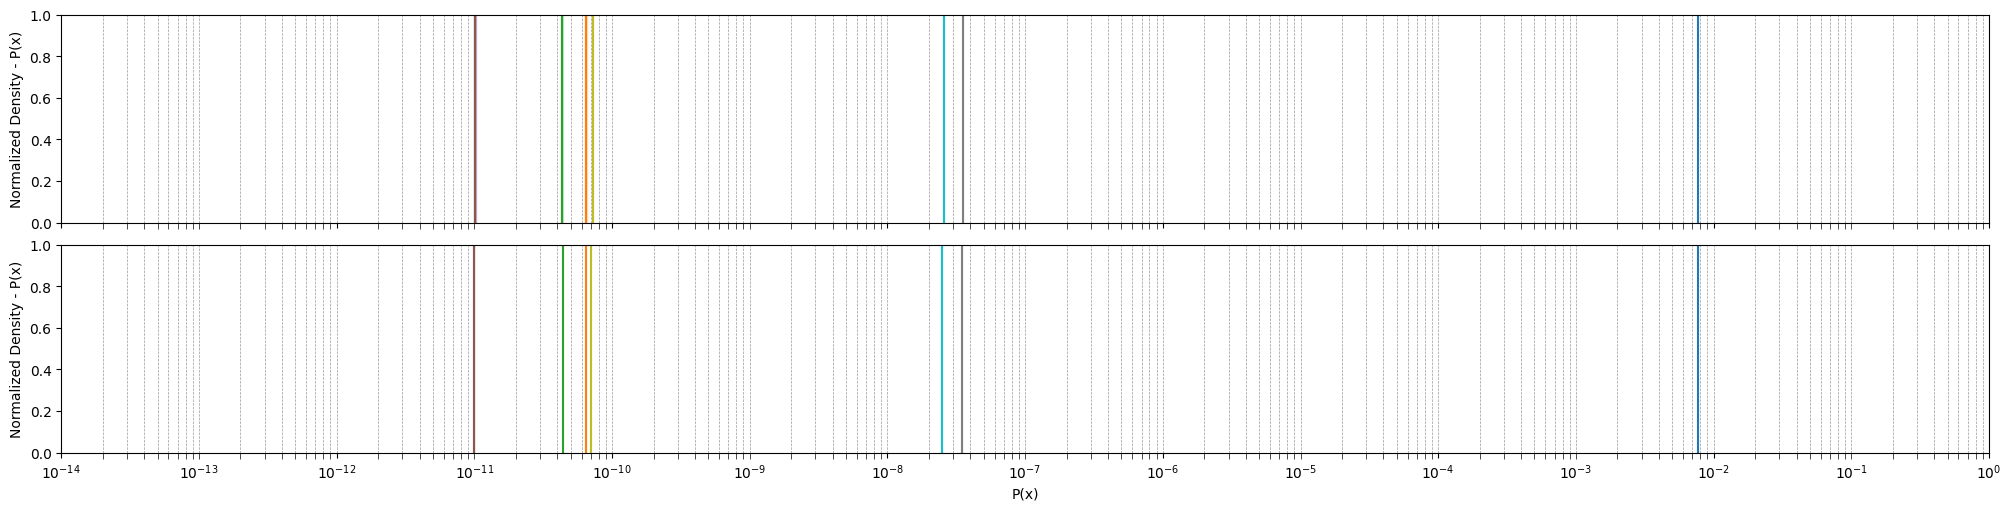

In [3]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 7.7e-3,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['RISB', 'RSIG', 'RROD', 'PRUN', 'BPHR', 'DHRS', 'DHRL|~BPHR', 'DHRL|~DHRS|BPHR'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    # 'RISB-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    #     'probability': 1 - 7.7e-3 - 6.5e-11 - 4.41e-11 - 1e-11 - 1e-11 - 3.49e-8 - 7.0e-11 - 2.5e-8
    # },
    'RISB-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 0, np.nan],
        'probability': 7.7e-3,
    },
    'RISB-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 1, np.nan],
        'probability': 6.5e-11,
    },
    'RISB-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 0],
        'probability': 4.41e-11,
    },
    'RISB-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 1],
        'probability': 1e-11,
    },
    'RISB-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan],
        'probability': 1e-11,
    },
    'RISB-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.49e-8,
    },
    'RISB-7': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 7.0e-11,
    },
    'RISB-8': {
        'sequence': [1, 1,np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 2.5e-8,

    },


}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)